In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential

In [15]:
(X_train,y_train),(X_test,y_test)= keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 76s 7us/step


In [92]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(80,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [93]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 80)             │        62,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,722 (256.73 KB)

 Trainable params: 65,722 (256.73 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics =["accuracy"])

In [103]:
history = model.fit(X_train,y_train,epochs =10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9725 - loss: 0.1115 - val_accuracy: 0.9761 - val_loss: 0.0918
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9797 - loss: 0.0785 - val_accuracy: 0.9567 - val_loss: 0.1773
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9770 - loss: 0.0872 - val_accuracy: 0.9688 - val_loss: 0.1354
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9803 - loss: 0.0772 - val_accuracy: 0.9759 - val_loss: 0.1129
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9827 - loss: 0.0649 - val_accuracy: 0.9747 - val_loss: 0.1157
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9837 - loss: 0.0662 - val_accuracy: 0.9725 - val_loss: 0.1254
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9854 - loss: 0.0612 - val_accuracy: 0.9769 - val_loss: 0.1140
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9868 - loss: 0.0536 - 

In [114]:
preds =model.predict(X_test)
preds

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.7259151e-07, 2.2724097e-11, 1.2088871e-09, ..., 9.9973661e-01,
        2.0492110e-11, 2.5375129e-04],
       [2.2099709e-08, 6.3030799e-05, 9.9984288e-01, ..., 7.8347999e-05,
        1.0992533e-14, 9.2090523e-16],
       [9.2468380e-19, 9.9999857e-01, 1.4690307e-10, ..., 1.4103705e-06,
        7.6310765e-15, 4.6075526e-12],
       ...,
       [8.1936246e-12, 4.0188537e-18, 3.7341250e-12, ..., 7.4008825e-20,
        2.9046116e-21, 1.7601458e-04],
       [2.6088827e-09, 6.7004446e-18, 0.0000000e+00, ..., 1.8790502e-32,
        9.7794110e-25, 1.4416844e-18],
       [1.3202817e-27, 8.3883802e-28, 2.5486997e-34, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

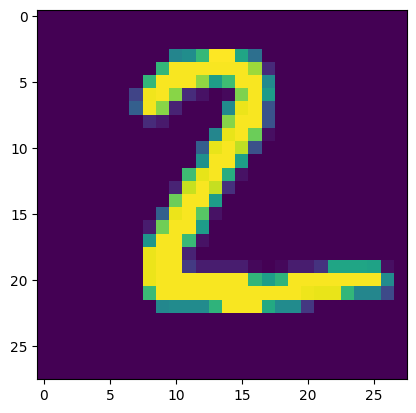

In [115]:
import matplotlib.pyplot as plt
plt.imshow(X_test[1])

In [122]:
# predictions=[]
# for i in range(preds.shape[0]):
#     max=0
#     index=0
#     for j in range(preds.shape[1]):
#         if max<preds[i][j]:
#             max=preds[i][j]
#             index=j
#     predictions.append(index)
# predictions
# better way 
preds =preds.argmax(axis=1)


        




In [123]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y_test,preds)
score

0.9675

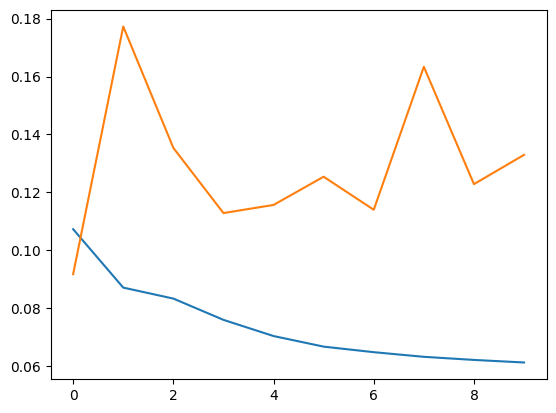

In [124]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

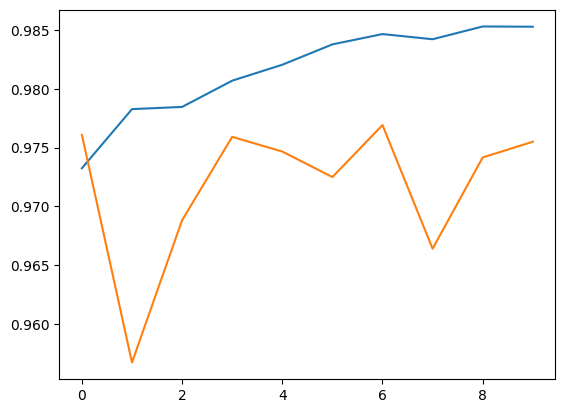

In [125]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])